<a href="https://colab.research.google.com/github/sebarevalo8/Data-bootcamp-seb/blob/main/Full_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Predicting AirBnB Prices in Amsterdam

##Introduction to the problem I tackled and the Data I used

#Problem Statement:
#### Problem Statement:
Airbnb is one of the biggest property rental services in the world, connecting millions of hosts and travelers globally. For my final project, I aim to develop a predictive model capable of accurately estimating the nightly prices of Airbnb listings and analyzing the trends and patterns that influence these prices. Nightly prices are a key metric for measuring a listing's profitability and appeal, offering valuable insights into the dynamics of the short-term rental market. I hope that my project is able to shed light on the most important characteristics.

This model may be useful for both hosts and travelers. Hosts can utilize predictions to optimize their pricing strategies and maximize earnings, while travelers can use the model to identify the best value listings within their budget. These predictions will allow stakeholders to make informed decisions, enhancing their overall experience and improving the platform's effectiveness in meeting user needs.

The successful development of this model will not only enhance predictive capabilities for Airbnb pricing but will also empower stakeholders in the hospitality and tourism industry with actionable insights. Hosts can align their listings with market demand and guest preferences, while Airbnb itself can use the insights to improve its pricing recommendations for hosts. Additionally, understanding the factors that drive pricing trends will contribute to better resource management, competitive positioning, and strategic planning in the fast-evolving short-term rental market.








#Data set description

The Data set I used was sourced from kaggle and was uploaded in CSV format. It shows me some data on certain Airbnb listings within the Amsterdam area. There might be certain aspects of the data that will need to be cleaned out but for the most part I feel like each characteristic of the data will allow me to properly determine the pricing of each property based on its attributes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/sebarevalo8/Data-bootcamp-seb/refs/heads/main/amsterdam_weekdays.csv'
Air = pd.read_csv(url)
Air

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
Air['realSum'].max()

7782.907224708832

In [ ]:
Air['realSum'].min()

128.88711831837463

In [ ]:
Air['dist'].max()

11.187100154117871

In [ ]:
Air['dist'].min()

0.0150587980705548

In [ ]:
Air['metro_dist'].max()

4.411915315184665

In [ ]:
Air['metro_dist'].min()

0.0365299349690898

##Just for a brief overview of the data.
Most of the attributes are self-explanatory, but for clarification:

realSum refers to the total cost of one night, including all cleaning and host fees.
dist is the distance from the city center, while dist_metro is the distance from the closest metro station.
multi indicates whether the listing includes multiple rooms.
biz refers to listings that accommodate business trips.
attr_index measures the attractiveness of listings based on their proximity to points of interest and their ratings.
rest_index does the same but focuses on proximity to restaurants.
The normalized (norm) versions of these data points scale the indexes from 0 to 100.

Text(0.5, 1.0, 'Distribution of Prices')

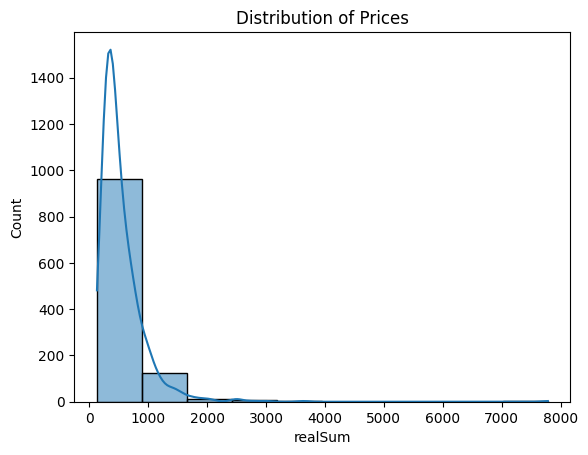

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data = Air, x = 'realSum',bins=10, kde=True)
plt.title('Distribution of Prices')




Here, we can see that most of the properties are listed for under 1000 per night, which makes sense, as very few people would be willing to pay even 500 per night.

Text(0.5, 1.0, 'Distance vs Price')

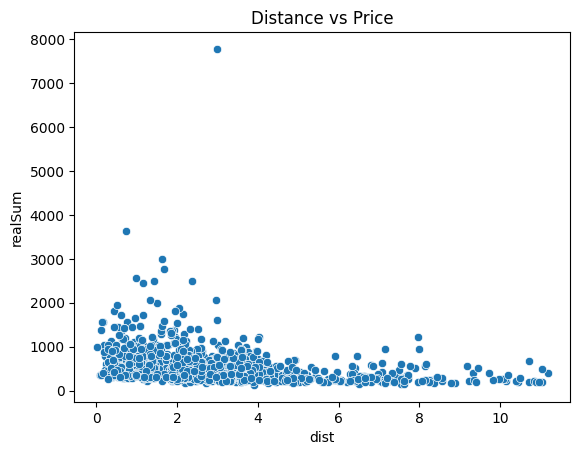

In [ ]:
sns.scatterplot(data = Air, x = 'dist',y='realSum')
plt.title('Distance vs Price')

This is a very important graph as it demonstrates that prices closer to the city center are more expensive, and most of the listings are located near the city center. It is important to note that these are listings for Amsterdam, where the attractions are primarily located in the city. If we were examining more remote or nature-rich cities, where attractions might not be in the city or there may not be a significant city at all, some properties might be listed at higher prices due to their views or proximity to other important areas.

Text(0.5, 1.0, 'attr_index vs Price')

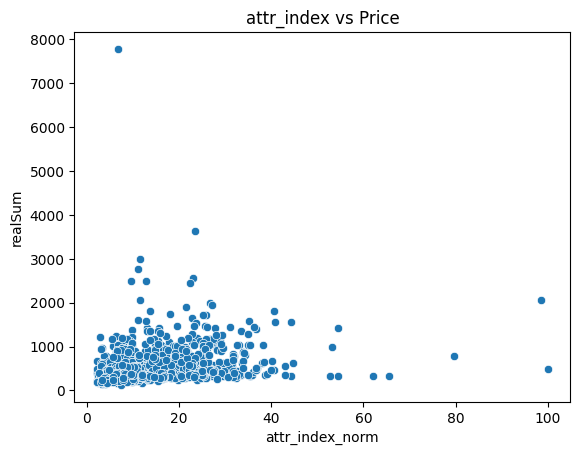

In [ ]:
sns.scatterplot(data = Air, x = 'attr_index_norm',y='realSum')
plt.title('attr_index vs Price')

Intrestingly enough the proximity of the Airbnb to points of interest does not necessarily mean that the price of the place is going to be higher. This can mean that alot of listors may be overpricing their properties especially if there main selling point is location.

Text(0.5, 1.0, 'Statisfaction vs Price')

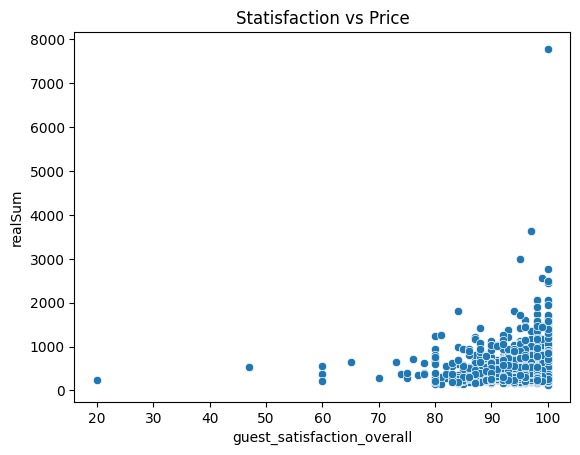

In [ ]:
sns.scatterplot(data = Air, x = 'guest_satisfaction_overall',y='realSum')
plt.title('Statisfaction vs Price')

This shows that alot of the listings are properly priced based on there guest satisfaction which is objectively one of the most if not the most important metric when predicting the price.

Text(0.5, 1.0, 'Distance vs Price')

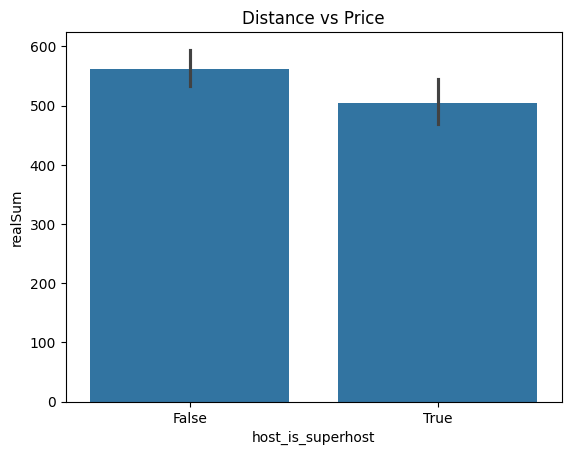

In [ ]:
sns.barplot(data = Air, x = 'host_is_superhost',y='realSum')
plt.title('Distance vs Price')

This bar plot shows the average price of a listing based on whether the host is a superhost or not (a superhost is someone who consistently provides exceptional service). We can clearly see that it does not make much of a difference. At the very least, it suggests that some hosts may be overcharging for their properties without having the accolades to justify it. This insight could also be important, as it may help identify properties that are potentially being undervalued.

### Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

###Multiple Regression Model

I chose to start off with a multiple regressions model as it allowed me to explore how each indepedent variable(listing's attributes) directly affected my depedant variable(listing price). It allowed me to directly model the relationship and the weight that each attribute had individually aswell as a collective.

In [ ]:

features = [
    'room_type', 'room_shared', 'room_private', 'person_capacity',
    'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
    'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
    'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm',
    'lng', 'lat'
]
target = 'realSum'
df = Air.dropna(subset=features + [target])
categorical_features = ['room_type', 'host_is_superhost', 'multi', 'biz']
numerical_features = [
    'room_shared', 'room_private', 'person_capacity', 'cleanliness_rating',
    'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
    'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

coefficients = pipeline.named_steps['model'].coef_
processed_features = numerical_features + list(
    pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
)
coeff_df = pd.DataFrame({'Feature': processed_features, 'Coefficient': coefficients})
print(coeff_df)

df['predicted_price'] = pipeline.predict(X)
df['price_difference'] = df['realSum'] - df['predicted_price']

Mean Squared Error (MSE): 43729.04999589627
R-squared (R²): 0.5512685732269514
                       Feature  Coefficient
0                  room_shared   -19.902301
1                 room_private   -71.655181
2              person_capacity   133.491851
3           cleanliness_rating     9.953843
4   guest_satisfaction_overall    18.840798
5                     bedrooms    89.626807
6                         dist   -52.072651
7                   metro_dist    -1.131343
8                   attr_index    33.615651
9              attr_index_norm    33.615651
10                  rest_index    -2.834850
11             rest_index_norm    -2.834850
12                         lng    12.394284
13                         lat    -4.814207
14      room_type_Private room   -35.826117
15       room_type_Shared room    -1.337248
16      host_is_superhost_True   -19.593751
17                     multi_1    -3.171838
18                       biz_1   -66.956902


Here we have the results of my model, and I will discuss its accuracy shortly. What is interesting is that this not only highlights the independent variable that carried the greatest weight in calculating the price but also shows how many dollars each unit increase would affect the price. For example, for every increase of 1 km in dist (distance from the city center), the price would decrease by $52, whereas every increase of 1 km from a metro station (metro_dist) would only decrease the price by 1 dollar.

An intriguing finding is the boolean variable host_is_superhost_True. One might expect that being designated as a superhost would result in higher prices, but in reality, it does not seem to have a significant impact. Additionally, the attribute that carries the most weight in calculating the price is person_capacity, which makes sense. Greater capacity often corresponds to larger homes, more maintenance, and higher overall costs for the host.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


mean_baseline = np.mean(y_test)


mean_predictions = [mean_baseline] * len(y_test)


mean_mse = mean_squared_error(y_test, mean_predictions)
mean_rmse = np.sqrt(mean_mse)
mean_r2 = r2_score(y_test, mean_predictions)

print("Baseline (Mean) Performance:")
print(f"Mean MSE: {mean_mse:.2f}, RMSE: {mean_rmse:.2f}, R²: {mean_r2:.2f}")

model_predictions = pipeline.predict(X_test)

model_mse = mean_squared_error(y_test, model_predictions)
model_rmse = np.sqrt(model_mse)
model_r2 = r2_score(y_test, model_predictions)

print("\nYour Model's Performance:")
print(f"Model MSE: {model_mse:.2f}, RMSE: {model_rmse:.2f}, R²: {model_r2:.2f}")


print("\nComparison:")
print(f"RMSE Improvement: {mean_rmse - model_rmse:.2f}")
print(f"R² Improvement: {model_r2 - mean_r2:.2f}")

Baseline (Mean) Performance:
Mean MSE: 97450.38, RMSE: 312.17, R²: 0.00

Your Model's Performance:
Model MSE: 43729.05, RMSE: 209.11, R²: 0.55

Comparison:
RMSE Improvement: 103.06
R² Improvement: 0.55


In terms of performance, our model did well. Its R^2 of 55% is good by most standards, and we outperformed our baseline mean prediction by about 103. However, it is worth noting that, in general, an MSE of 43,729 is not impressive by any stretch. That said, we must consider the large range of prices observed in our data analysis, which can account for the high MSE. Even so, having a number that large is generally not ideal.

In [ ]:
df['price_difference'] = df['realSum'] - df['predicted_price']
undervalued_properties = df.sort_values(by='price_difference').head(10)
print("Top 10 Underpriced Properties:")
print(undervalued_properties[['realSum', 'predicted_price', 'price_difference']])
# Calculate the price difference if not already done
df['price_difference'] = df['realSum'] - df['predicted_price']

# Identify the top 10 overvalued properties
overvalued_properties = df.sort_values(by='price_difference', ascending=False).head(10)

print("Top 10 Overvalued Properties:")
print(overvalued_properties[['realSum', 'predicted_price', 'price_difference']])

Top 10 Underpriced Properties:
        realSum  predicted_price  price_difference
338  491.645771      1169.355851       -677.710079
308  318.234012       900.394397       -582.160385
312  326.670260       898.057070       -571.386810
126  596.161507      1129.909052       -533.747544
789  606.003796      1122.633683       -516.629886
32   516.017154      1027.163589       -511.146435
356  399.550067       904.753310       -505.203243
348  539.685515      1040.443000       -500.757485
360  439.856584       936.831345       -496.974762
981  782.461978      1274.928792       -492.466814
Top 10 Overvalued Properties:
          realSum  predicted_price  price_difference
970   7782.907225      1232.599145       6550.308079
133   3637.663159      1150.728186       2486.934974
1098  2486.115342       515.866630       1970.248712
99    3004.944579      1143.200481       1861.744097
7     2771.307384      1024.061806       1747.245578
253   2500.878776       806.183072       1694.695704
1056  1

This demonstrates some of the more functional uses of my model as it compares the actual price of the listings to the values predicted by the model. If my model had access to more data, the predictions might be more accurate, and this information could be even more useful. However, it serves as a good starting point for highlighting certain listings that may be undervalued in the market, helping identify potential steals as well as possible scams.

###Decision Tree Regressor

Second I chose to contrast my multiple regressor model with a decision tree regressor. With this model I hope to capture some of the non linear relationships within my data aswell as being able to properly display the set of choices that my model made with my data.

Mean Squared Error: 44449.46
R-squared: 0.54


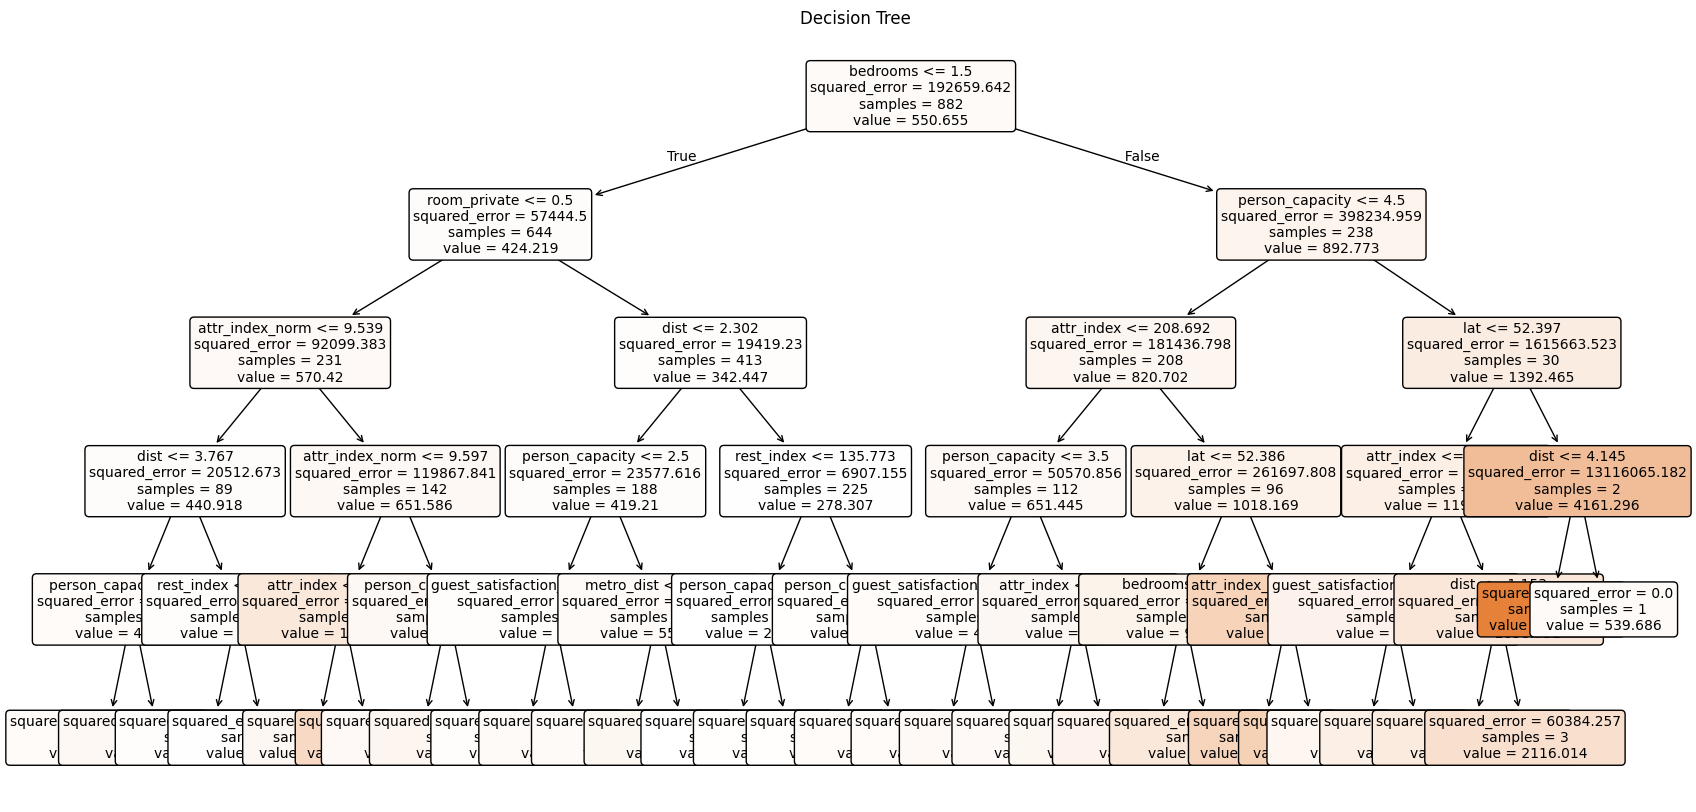


Feature Importances:
                       Feature  Importance
8                     bedrooms    0.305885
9                         dist    0.224776
16                         lat    0.180622
2              person_capacity    0.093840
11                  attr_index    0.091396
1                 room_private    0.058999
12             attr_index_norm    0.032625
7   guest_satisfaction_overall    0.008377
13                  rest_index    0.001795
10                  metro_dist    0.001686
3            host_is_superhost    0.000000
4                        multi    0.000000
5                          biz    0.000000
6           cleanliness_rating    0.000000
14             rest_index_norm    0.000000
15                         lng    0.000000
0                  room_shared    0.000000


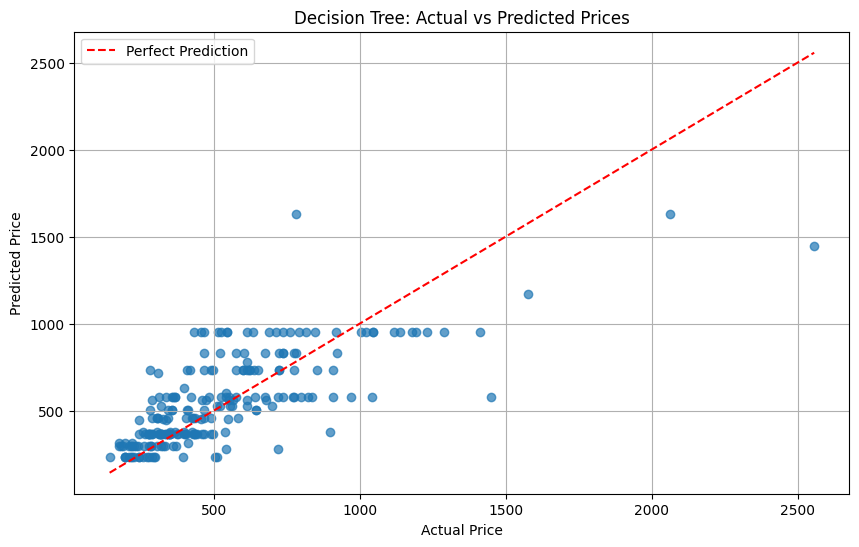

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

features = [
    'room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
    'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
    'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
    'rest_index', 'rest_index_norm', 'lng', 'lat'
]
target = 'realSum'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)


dt_regressor.fit(X_train, y_train)


y_pred = dt_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(20, 10))
plot_tree(
    dt_regressor,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree')
plt.show()

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': dt_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.legend()
plt.grid()
plt.show()

The Decision Tree model underperformed compared to the Multiple Regression model, likely due to overfitting. While the tree captured specific patterns in the training data, it struggled to generalize, resulting in a slightly higher MSE and lower R^2. In contrast, the Multiple Regression model’s simplicity allowed it to better explain overall trends and variability, leading to more robust performance.

The Decision Tree’s sensitivity to noise and potential reliance on irrelevant features may have further reduced its effectiveness. This highlights the importance of model selection and hyperparameter tuning. Ensemble methods like Random Forest or Gradient Boosting could be explored to address these limitations by improving generalization and reducing overfitting.

Compared to the Multiple Regression model, the Decision Tree’s predictions for the most important attributes were almost completely different. The only overlap was that person_capacity appeared in the top four for both models. Interestingly, the Decision Tree placed latitude as an important feature, which makes no sense. Latitude, without longitude, is irrelevant, and it has no logical connection to the price (realSum) without additional context or visualization. This further highlights the shortcomings of the Decision Tree model, effectively putting the final nail in the coffin for its usefulness in this analysis.

###Random Forest Regressor

As mentioned in my decision tree right up I decided to use an ensemble model such as the random forest to see if it would hail better results. My theorie is that if 1 tree did not work maybe its short comings will be fixed by just adding a lot more.

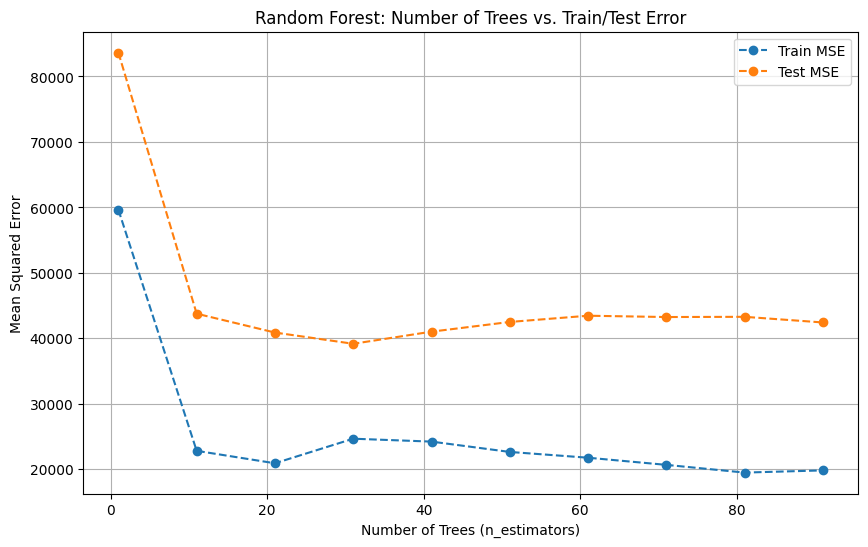

Final Model - Mean Squared Error: 41225.75
Final Model - R-squared: 0.58

Feature Importances:
                       Feature  Importance
8                     bedrooms    0.189505
2              person_capacity    0.165503
16                         lat    0.119659
9                         dist    0.090612
10                  metro_dist    0.066827
7   guest_satisfaction_overall    0.065426
1                 room_private    0.062774
11                  attr_index    0.048279
15                         lng    0.046509
12             attr_index_norm    0.046281
14             rest_index_norm    0.036810
13                  rest_index    0.034411
4                        multi    0.013125
6           cleanliness_rating    0.007031
3            host_is_superhost    0.004830
5                          biz    0.001972
0                  room_shared    0.000446


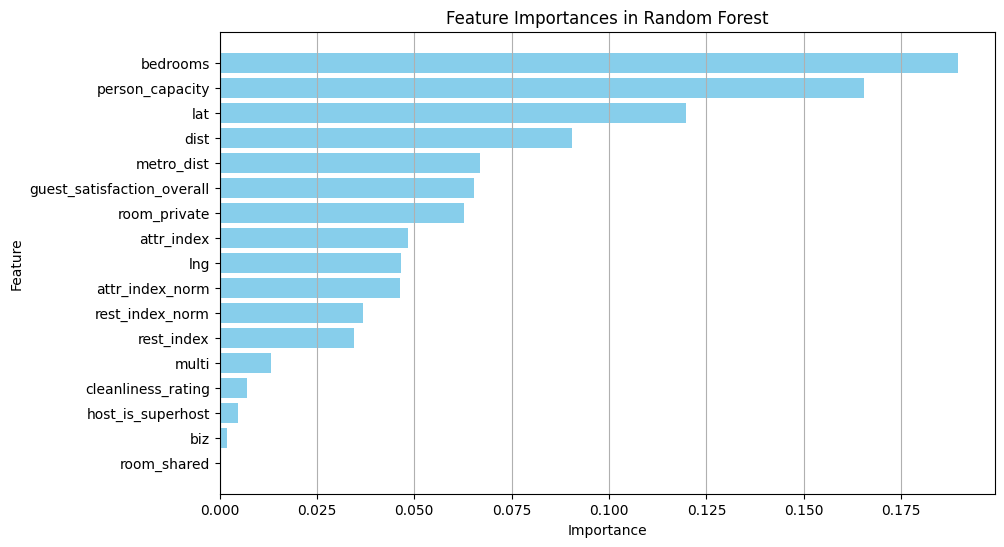

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


features = [
    'room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
    'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
    'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
    'rest_index', 'rest_index_norm', 'lng', 'lat'
]
target = 'realSum'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
test_scores = []

n_estimators_range = range(1, 101, 10)

for n in n_estimators_range:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_regressor.fit(X_train, y_train)

    y_train_preds = rf_regressor.predict(X_train)
    y_test_preds = rf_regressor.predict(X_test)

    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, '--o', label='Train MSE')
plt.plot(n_estimators_range, test_scores, '--o', label='Test MSE')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest: Number of Trees vs. Train/Test Error')
plt.legend()
plt.grid()
plt.show()

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model - Mean Squared Error: {mse:.2f}")
print(f"Final Model - R-squared: {r2:.2f}")

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

The Random Forest model outperformed both the Decision Tree and the Multiple Regression model in predicting Airbnb prices (realSum). While the Decision Tree struggled with overfitting, focusing on localized patterns that didn’t generalize well, the Random Forest mitigated this issue by averaging the predictions of multiple trees. This ensemble approach reduced variance and improved generalization, resulting in a lower Mean Squared Error (MSE) and a higher R^2.

Compared to the Multiple Regression model, the Random Forest captured complex, non-linear relationships between features and the target variable. Multiple Regression, constrained by its assumption of linearity, was unable to fully grasp the interactions among certain features. The Random Forest’s ability to model these interactions and its robustness to noise in the data allowed it to provide more accurate predictions.

However, one notable pitfall remains. While the Random Forest, like the Multiple Regression model, highlighted bedrooms and person_capacity as the two most influential factors in determining a listing’s price, it also identified latitude as an important metric. As previously discussed, latitude alone is meaningless without longitude, as geographic location requires both coordinates to be relevant. This issue may have arisen due to an indirect correlation between latitude and realSum, or between latitude and other variables that the model overemphasized. This highlights the need to carefully interpret feature importance and consider deriving a combined location metric, such as distance to a central point, to avoid misleading conclusions.









Top 10 Undervalued Properties:
     Actual Price  Predicted Price  Difference
981    782.461978      1274.928792 -492.466814
360    439.856584       936.831345 -496.974762
348    539.685515      1040.443000 -500.757485
356    399.550067       904.753310 -505.203243
32     516.017154      1027.163589 -511.146435
789    606.003796      1122.633683 -516.629886
126    596.161507      1129.909052 -533.747544
312    326.670260       898.057070 -571.386810
308    318.234012       900.394397 -582.160385
338    491.645771      1169.355851 -677.710079

Top 10 Overvalued Properties:
      Actual Price  Predicted Price   Difference
574    2058.210109       895.332968  1162.877141
158    2556.183067      1367.220767  1188.962300
271    2458.228857      1258.988091  1199.240765
1056   1941.508682       683.269722  1258.238960
253    2500.878776       806.183072  1694.695704
7      2771.307384      1024.061806  1747.245578
99     3004.944579      1143.200481  1861.744097
1098   2486.115342       515

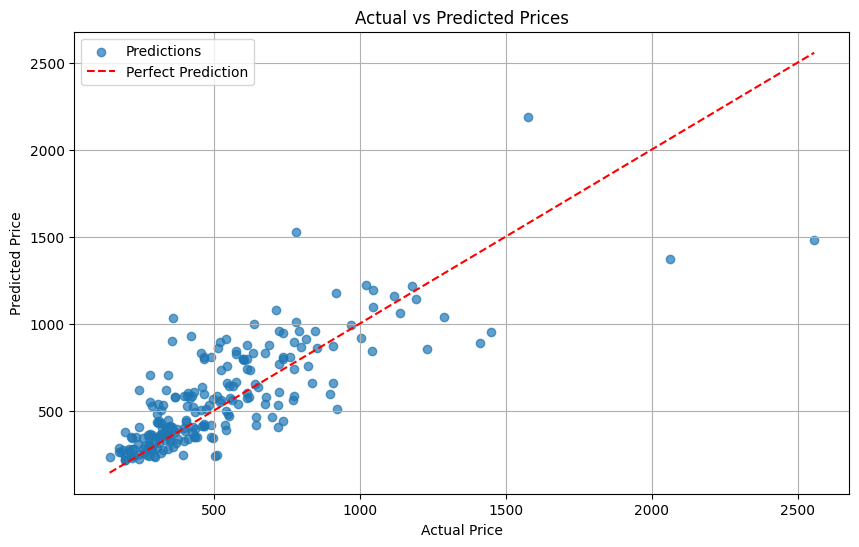

In [ ]:

undervalued = df.sort_values(by='price_difference', ascending=True).head(10)
undervalued = undervalued.rename(columns={'realSum': 'Actual Price', 'predicted_price': 'Predicted Price', 'price_difference': 'Difference'})

overvalued = df.sort_values(by='price_difference', ascending=False).head(10)
overvalued = overvalued.rename(columns={'realSum': 'Actual Price', 'predicted_price': 'Predicted Price', 'price_difference': 'Difference'})

test_results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
test_results = test_results.reset_index(drop=True)
print("\nTop 10 Undervalued Properties:")
print(undervalued[['Actual Price', 'Predicted Price', 'Difference']].sort_values(by='Difference', ascending=False).head(10))

print("\nTop 10 Overvalued Properties:")
print(overvalued[['Actual Price', 'Predicted Price', 'Difference']].sort_values(by='Difference').head(10))

plt.figure(figsize=(10, 6))
plt.scatter(test_results['Actual Price'], test_results['Predicted Price'], alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid()
plt.show()

Something really interesting about this model is that it predicted the exact same top 10 overvalued and undervalued properties as my Multiple Regression model. This is impressive because it suggests that there may be genuine validity to the results, supporting one of my original goals: analyzing the data to help customers determine whether a listing is underpriced or overpriced. This insight could even be added as an additional column to the dataset, providing users with a valuable tool for making informed decisions about their listings.

###Gradient Boosting Regressor

I finally decided to use a gradient boosting model to really just take that next step up from Random Forest and Decision trees.

Mean Squared Error: 49657.05
R-squared: 0.49

Top 10 Overvalued Properties:
      Actual Price  Predicted Price  Price Difference
158    2556.183067      1570.801221        985.381845
1057   1450.097251       730.688586        719.408666
752    1228.880088       688.284386        540.595702
388    2061.959553      1554.693644        507.265909
568    1413.305837       984.175607        429.130230
701    1041.173576       712.131915        329.041661
10      909.474375       581.808553        327.665822
814     699.036862       378.678626        320.358236
76      497.738617       194.694267        303.044350
618     921.660066       625.214289        296.445777

Top 10 Undervalued Properties:
      Actual Price  Predicted Price  Price Difference
888     737.234317      1902.607950      -1165.373633
56      780.352916      1548.788141       -768.435225
1071    351.510323      1079.705225       -728.194902
694     319.405713       994.446593       -675.040879
453     356.431467       951

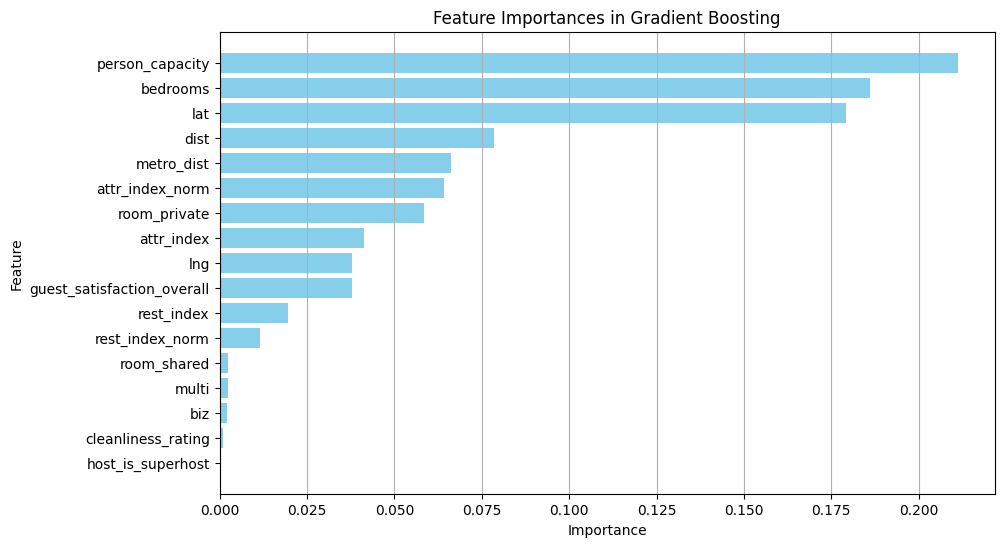

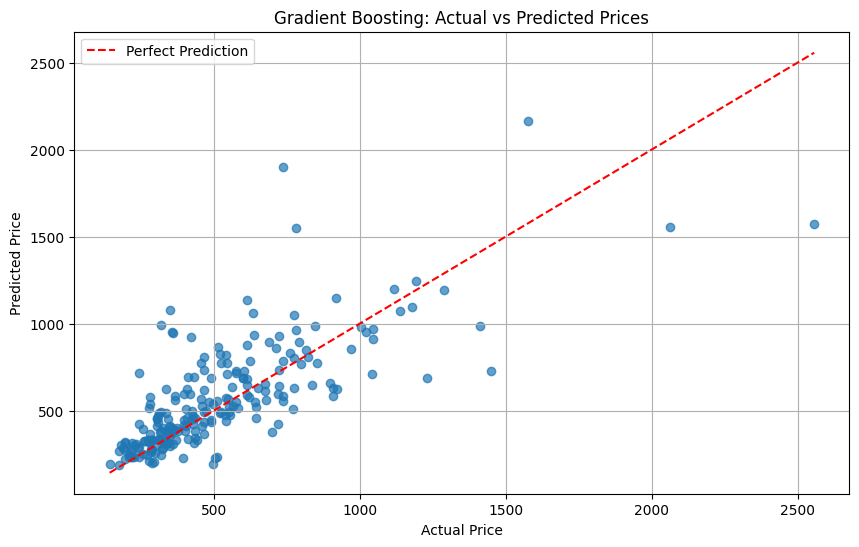

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split



features = [
    'room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
    'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
    'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
    'rest_index', 'rest_index_norm', 'lng', 'lat'
]
target = 'realSum'


X = Air[features]
y = Air[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

results = X_test.copy()
results['Actual Price'] = y_test
results['Predicted Price'] = y_pred
results['Price Difference'] = results['Actual Price'] - results['Predicted Price']

overvalued_properties = results.sort_values(by='Price Difference', ascending=False).head(10)
print("\nTop 10 Overvalued Properties:")
print(overvalued_properties[['Actual Price', 'Predicted Price', 'Price Difference']])

undervalued_properties = results.sort_values(by='Price Difference').head(10)
print("\nTop 10 Undervalued Properties:")
print(undervalued_properties[['Actual Price', 'Predicted Price', 'Price Difference']])


feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boosting')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.legend()
plt.grid()
plt.show()

The Gradient Boosting model underperformed because it struggled to use the features effectively and wasn’t fine-tuned for the data. It incorrectly emphasized features like latitude and longitude individually, which don’t make sense without being combined into a meaningful location metric, such as distance from key landmarks. Without proper tuning, the model likely underfit the data, failing to capture complex patterns like how person_capacity and bedrooms interact to influence price. In contrast, the Multiple Regression model performed better by focusing on linear relationships, while Random Tree and Random Forest models excelled by naturally handling interactions and noise, leveraging their ability to generalize better across the dataset.

###Next Steps and Discussion
##Summary of Findings

In my analysis of Airbnb pricing, the models I constructed demonstrated improved performance over the baseline predictor, with the Random Forest model emerging as the best. This model's ability to capture complex, non-linear interactions between features made it the most precise in predicting listing prices. The ensemble nature of Random Forest, which combines the predictions of multiple decision trees, allowed it to generalize well to unseen data, outperforming other models such as Gradient Boosting, Decision Tree Regression, and Multiple Linear Regression. Key predictors such as person_capacity and bedrooms consistently ranked as the most influential across all models, which aligns with logical assumptions that larger properties with more capacity typically command higher prices. Additionally, features like dist (distance from the city center) also showed strong importance, highlighting the significance of location in determining listing value. However, features like latitude and longitude were inconsistently ranked across models. For instance, Gradient Boosting and Random Forest assigned high importance to latitude, which may reflect indirect correlations rather than a meaningful relationship with price. This is true due to the fact that latitude is irrelevant without longitude to give you a precise point.

Despite the success of the models, there is room for improvement in refining the features and expanding the dataset. Incorporating additional features such as seasonal pricing trends, including peak tourist seasons and holidays, could help the models capture temporal fluctuations in pricing. Moreover, integrating further guest reviews and host attributes, such as response times and hosting experience, could offer insights into the role of service quality on price. Adding detailed neighborhood data, such as safety ratings, walkability scores, and proximity to attractions, would help the models better differentiate pricing based on local desirability. Furthermore, including demand-related metrics, such as the number of available listings in the area or occupancy rates, could enhance the models’ ability to understand market dynamics and competition. Finally, something that I would like to add that would make the model more user-friendly would be a map with the longitude and latitude combined for easier visualization of listing location. This could be added not only as a quality-of-life update, but by combining longitude and latitude, we could actually give them value within the dataframe and the model.

These enhancements would likely provide more accurate predictions and deeper insights into the drivers of Airbnb pricing. By expanding the scope of features and focusing on capturing both spatial and temporal attributes, the models could be refined to not only predict prices more accurately but also offer actionable recommendations for Airbnb hosts. This would enable hosts to strategically price their listings and maximize revenue while helping potential guests identify properties that provide the best value. Ultimately, such improvements would align with the original goal of using data analysis to better understand and optimize the Airbnb market.






